In [1]:
import pandas as pd
import numpy as np

Cargamos el dataset y lo preprocesamos para cargar el modelo.

In [2]:
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
# Ruta al archivo CSV
archivo_csv = 'Datasets/240310F1_Dataset.csv'
encoder = LabelEncoder()
# Leer el archivo CSV
df_F1 = pd.read_csv(archivo_csv)


df_F1.drop('DesgasteVuelta', axis=1, inplace=True)
df_F1.drop('Clima', axis=1, inplace=True)
df_F1.drop('TemperaturaPista', axis=1, inplace=True)
df_F1.drop( 'ConfianzaPilotoCoche', axis=1, inplace=True)
df_F1.drop( 'ConfianzaPilotoPista', axis=1, inplace=True)
df_F1.drop( 'AgarreAsfalto', axis=1, inplace=True)
df_F1.drop( 'GomaEnPista', axis=1, inplace=True)


#Eliminamos las filas que contengan NaN
df_F1.dropna(inplace=True)

# Eliminar filas donde 'SafetyCar' es True
df_F1 = df_F1[df_F1['SafetyCar'] == False]
df_F1.drop('SafetyCar', axis=1, inplace=True)


# Eliminar filas donde haya trafico ya que no son representativas.
df_F1 = df_F1[df_F1['Trafico'] == False]
df_F1.drop('Trafico', axis=1, inplace=True)

encoder = LabelEncoder()
df_F1['Piloto'] = encoder.fit_transform(df_F1['Piloto'])

df_F1 = pd.get_dummies(df_F1, columns = ['Neumáticos'] )
df_F1 = pd.get_dummies(df_F1, columns = ['ModoPilotaje'] )


In [4]:

# Selecting the 'CargaCombustible' column
carga_combustible = df_F1['CargaCombustible'].values.reshape(-1, 1)

min_max_scaler = MinMaxScaler()
carga_combustible_minmax = min_max_scaler.fit_transform(carga_combustible)

df_F1['CargaCombustible'] = carga_combustible_minmax


# Selecting the 'VidaNeumatico' column
Vida_neumatico = df_F1['VidaNeumatico'].values.reshape(-1, 1)

vida_neumatico_min_max = min_max_scaler.fit_transform(Vida_neumatico)

df_F1['VidaNeumatico'] = vida_neumatico_min_max


# Selecting the 'CantidadAgua' column
Cantidad_Agua = df_F1['CantidadAgua'].values.reshape(-1, 1)

Cantidad_Agua_min_max = min_max_scaler.fit_transform(Cantidad_Agua)

df_F1['CantidadAgua'] = Cantidad_Agua_min_max

df_Bahrein = df_F1[df_F1['Circuito'] == 'Bahrein']
df_Bahrein = df_Bahrein.drop(columns=['Circuito'], axis = 1)

df_Jeddah = df_F1[df_F1['Circuito'] == 'Jeddah']
df_Jeddah = df_Jeddah.drop(columns=['Circuito'], axis = 1)

df_Australia = df_F1[df_F1['Circuito'] == 'Australia']
df_Australia = df_Australia.drop(columns=['Circuito'], axis=1)

df_Imola = df_F1[df_F1['Circuito'] == 'Imola']
df_Imola = df_Imola.drop(columns=['Circuito'], axis=1)

df_Miami = df_F1[df_F1['Circuito'] == 'Miami']
df_Miami = df_Miami.drop('Circuito', axis=1)



Ahora entrenamos el modelo que nos ha dado el mejor resultado en la comparación de modelos.

In [103]:
df_F1 = df_Miami
X = df_F1.drop('TiempoVuelta', axis=1)  
y = df_F1['TiempoVuelta']  
# Configuración de K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # shuffle y random_state son opcionales pero recomendados

mse_scores = []
mae_scores = []

# Bucle K-Fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Crear y entrenar el modelo
    time_estimator_model = RandomForestRegressor(n_estimators=200)
    time_estimator_model.fit(X_train, y_train)

    # Hacer predicciones y evaluar
    y_pred = time_estimator_model.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))

# Calcular la media de los errores
mean_mse = np.mean(mse_scores)
mean_mae = np.mean(mae_scores)

print(f"Error Cuadrático Medio Promedio: {mean_mse}")
print(f"Error Absoluto Medio Promedio: {mean_mae}")

Error Cuadrático Medio Promedio: 0.08016516433044293
Error Absoluto Medio Promedio: 0.1655378620129973


In [104]:
time_estimator_model = RandomForestRegressor(n_estimators=200)
time_estimator_model.fit(X, y)

RandomForestRegressor(n_estimators=200)

Funcion para transformar una entrada al formato aceptado por el modelo para estimar el tiempo por vuelta:

In [67]:
def lap_time_transform_data( sesion, Neumaticos, ModoPilotaje, 
            CargaCombustible, Sobrecalentamiento, VidaNeumatico, agua, piloto, combustible):
    
    if piloto == "Sainz":
        piloto = 0
    else: piloto = 1

    

    if Neumaticos == 'Soft':
        Neumaticos_Soft = True
        Neumaticos_Medium = False
        Neumaticos_Hard = False
        Neumaticos_Inter = False
        Neumaticos_Rain = False
    elif Neumaticos == 'Medium':
        Neumaticos_Soft = False
        Neumaticos_Medium = True
        Neumaticos_Hard = False
        Neumaticos_Inter = False
        Neumaticos_Rain = False
    elif Neumaticos == 'Hard':
        Neumaticos_Soft = False
        Neumaticos_Medium = False
        Neumaticos_Hard = True
        Neumaticos_Inter = False
        Neumaticos_Rain = False
    elif Neumaticos == 'Inter':
        Neumaticos_Soft = False
        Neumaticos_Medium = False
        Neumaticos_Hard = False
        Neumaticos_Inter = True
        Neumaticos_Rain = False
    else:
        Neumaticos_Soft = False
        Neumaticos_Medium = False
        Neumaticos_Hard = False
        Neumaticos_Inter = False
        Neumaticos_Rain = True

    if ModoPilotaje == 'Push':
        ModoPilotaje_Push = True
        ModoPilotaje_Balanced = False
        ModoPilotaje_Save = False
    elif ModoPilotaje == 'Balanced':
        ModoPilotaje_Push = False
        ModoPilotaje_Balanced = True
        ModoPilotaje_Save = False
    elif ModoPilotaje == 'Save':
        ModoPilotaje_Push = False
        ModoPilotaje_Balanced = False
        ModoPilotaje_Save = True




    new_df = pd.DataFrame({
        
        'Entrenamientos' : [sesion],
        'CargaCombustible' : [CargaCombustible],
        'Sobrecalentamiento' : [Sobrecalentamiento],
        'VidaNeumatico' : [VidaNeumatico],
        'CantidadAgua' : [agua],
        'Piloto' : [piloto],
        'CombustibleAlto' : [combustible],
        'Neumáticos_Hard' : [Neumaticos_Hard],
        'Neumáticos_Inter' : [Neumaticos_Inter],
        'Neumáticos_Medium' : [Neumaticos_Medium],
        'Neumáticos_Rain' : [Neumaticos_Rain],
        'Neumáticos_Soft' : [Neumaticos_Soft],
        'ModoPilotaje_Balanced' : [ModoPilotaje_Balanced],
        'ModoPilotaje_Push' : [ModoPilotaje_Push],
        'ModoPilotaje_Save' : [ModoPilotaje_Save],
    })

    return new_df

Ahora para trabajar en el algoritmo que calcule las mejores estrategias necesitaremos un modelo que estime el desgaste por vuelta del neumático

In [68]:
# Ruta al archivo CSV
archivo_csv = 'Datasets/240310F1_Dataset.csv'
encoder = LabelEncoder()
# Leer el archivo CSV
df_F1 = pd.read_csv(archivo_csv)

df_F1.drop('CargaCombustible', axis=1, inplace=True)
df_F1.drop('Sobrecalentamiento', axis=1, inplace=True)
df_F1.drop('Entrenamientos', axis=1, inplace=True)
df_F1.drop('Clima', axis=1, inplace=True)
df_F1.drop('TemperaturaPista', axis=1, inplace=True)
df_F1.drop( 'ConfianzaPilotoCoche', axis=1, inplace=True)
df_F1.drop( 'ConfianzaPilotoPista', axis=1, inplace=True)
df_F1.drop( 'AgarreAsfalto', axis=1, inplace=True)
df_F1.drop( 'GomaEnPista', axis=1, inplace=True)
df_F1.drop('VidaNeumatico', axis=1, inplace=True)
df_F1.drop('TiempoVuelta', axis=1, inplace=True)
df_F1.drop('CantidadAgua', axis=1, inplace=True)
df_F1.drop('Piloto', axis=1, inplace=True)
df_F1.drop('CombustibleAlto', axis=1, inplace=True)

#Eliminamos las filas que contengan NaN
df_F1.dropna(inplace=True)

# Eliminar filas donde 'SafetyCar' es True
df_F1 = df_F1[df_F1['SafetyCar'] == False]
df_F1.drop('SafetyCar', axis=1, inplace=True)


# Eliminar filas donde haya trafico ya que no son representativas.
df_F1 = df_F1[df_F1['Trafico'] == False]
df_F1.drop('Trafico', axis=1, inplace=True)

df_F1 = pd.get_dummies(df_F1, columns = ['Neumáticos'] )
df_F1 = pd.get_dummies(df_F1, columns = ['ModoPilotaje'] )

df_Bahrein_Wheel_life = df_F1[df_F1['Circuito'] == 'Bahrein']
df_Bahrein_Wheel_life = df_Bahrein_Wheel_life.drop(columns=['Circuito'], axis = 1)

df_Jeddah_Wheel_life = df_F1[df_F1['Circuito'] == 'Jeddah']
df_Jeddah_Wheel_life = df_Jeddah_Wheel_life.drop(columns=['Circuito'], axis = 1)

df_Australia_Wheel_life = df_F1[df_F1['Circuito'] == 'Australia']
df_Australia_Wheel_life = df_Australia_Wheel_life.drop(columns=['Circuito'], axis = 1)

df_Imola_Wheel_life = df_F1[df_F1['Circuito'] == 'Imola']
df_Imola_Wheel_life = df_Imola_Wheel_life.drop(columns=['Circuito'], axis = 1)

df_Miami_Wheel_life = df_F1[df_F1['Circuito'] == 'Miami']
df_Miami_Wheel_life = df_Miami_Wheel_life.drop(columns=['Circuito'], axis = 1)


In [105]:
X = df_Miami_Wheel_life.drop('DesgasteVuelta', axis=1)
Y = df_Miami_Wheel_life['DesgasteVuelta']

# Configuración de K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # shuffle y random_state son opcionales pero recomendados

mse_scores = []
mae_scores = []

# Bucle K-Fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Convertir y_train y y_test a arreglos unidimensionales
    y_train = y_train.values.ravel()  # Si Y es un DataFrame
    y_test = y_test.values.ravel()    # Si Y es un DataFrame
    
    # Crear y entrenar el modelo
    degradation_estimator = RandomForestRegressor(n_estimators=200)
    degradation_estimator.fit(X_train, y_train)

    # Hacer predicciones y evaluar
    y_pred = degradation_estimator.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))

# Calcular la media de los errores
mean_mse = np.mean(mse_scores)
mean_mae = np.mean(mae_scores)

print(f"Error Cuadrático Medio Promedio: {mean_mse}")
print(f"Error Absoluto Medio Promedio: {mean_mae}")

Error Cuadrático Medio Promedio: 0.3306881118816782
Error Absoluto Medio Promedio: 0.45559654289716267


In [70]:
def wheelLife_transform_data( Neumaticos, ModoPilotaje):
    

    if Neumaticos == 'Soft':
        Neumaticos_Soft = True
        Neumaticos_Medium = False
        Neumaticos_Hard = False
        Neumaticos_Inter = False
        Neumaticos_Rain = False
    elif Neumaticos == 'Medium':
        Neumaticos_Soft = False
        Neumaticos_Medium = True
        Neumaticos_Hard = False
        Neumaticos_Inter = False
        Neumaticos_Rain = False
    elif Neumaticos == 'Hard':
        Neumaticos_Soft = False
        Neumaticos_Medium = False
        Neumaticos_Hard = True
        Neumaticos_Inter = False
        Neumaticos_Rain = False
    elif Neumaticos == 'Inter':
        Neumaticos_Soft = False
        Neumaticos_Medium = False
        Neumaticos_Hard = False
        Neumaticos_Inter = True
        Neumaticos_Rain = False
    elif Neumaticos == 'Rain':
        Neumaticos_Soft = False
        Neumaticos_Medium = False
        Neumaticos_Hard = False
        Neumaticos_Inter = False
        Neumaticos_Rain = True

    if ModoPilotaje == 'Push':
        ModoPilotaje_Push = True
        ModoPilotaje_Balanced = False
        ModoPilotaje_Save = False
    elif ModoPilotaje == 'Balanced':
        ModoPilotaje_Push = False
        ModoPilotaje_Balanced = True
        ModoPilotaje_Save = False
    elif ModoPilotaje == 'Save':
        ModoPilotaje_Push = False
        ModoPilotaje_Balanced = False
        ModoPilotaje_Save = True




    new_df = pd.DataFrame({

        'Neumáticos_Hard' : [Neumaticos_Hard],
        'Neumáticos_Inter' : [Neumaticos_Inter],
        'Neumáticos_Medium' : [Neumaticos_Medium],
        'Neumáticos_Rain' : [Neumaticos_Rain],
        'Neumáticos_Soft' : [Neumaticos_Soft],
        'ModoPilotaje_Balanced' : [ModoPilotaje_Balanced],
        'ModoPilotaje_Push' : [ModoPilotaje_Push],
        'ModoPilotaje_Save' : [ModoPilotaje_Save]
    })

    return new_df

Ya que tenemos el método que estima el tiempo por vuelta y el método que estima el desgaste del neumático. Ahora vamos a crear el algortimo que nos indique cuales serán las mejores estrategias.

In [71]:
#Estas son las vueltas que hay que dar a cada circuito de formula 1.
Vueltas_bahrein = 57
Vueltas_Jeddah = 50
Vueltas_Australia = 58
Vueltas_Imola = 63
Vueltas_Miami = 57

#Usaremos un tiempo de pérdida en pitstops genérico para todos los circuitos, aunque entre cada circuito
# puede variar en alguno segundo dependiendo de la distribucion del pitstop y de donde y como esté colocado.
Perdida_Boxes_Normal = 22
Perdida_Boxes_SafetyCar = 16

#Utilizaremos la siguiente estructura para definir la estrategia de carrera:
estrategiaCarrera = [
    {
        "stint": 1,
        "neumatico": "",
        "vueltas": 0,
        "modosConduccion": [""]
    },
    {
        "stint": 2,
        "neumatico": "",
        "vueltas": 0,
        "modosConduccion": [""] 
    },
    {
        "stint": 3,
        "neumatico": "",
        "vueltas": 0,
        "modosConduccion": [""]
    }
]

In [72]:
import random

In [73]:
def Calcular_vueltas_stints(vueltas):
    # Decidir si el primer número será 0 con una probabilidad del 50%
    if random.randint(1, 10) < 6:
        primer_numero = 0 
    else:
       primer_numero = random.randint(1, vueltas-3)

    if primer_numero == 0:
        # Solo necesitamos generar dos números cuya suma sea igual al total
        a = 0
        b = random.randint(1, vueltas-a-1)
        c = vueltas - (a + b)
    else:
        # El primer número ya no es cero, generamos los otros dos ajustando el total
        nuevo_total = vueltas - primer_numero
        a = primer_numero  # El primer número ya determinado
        b = random.randint(1, nuevo_total-1)  # Aseguramos espacio para un número más
        c = nuevo_total - b

    return a, b, c


In [74]:
def Generar_Estrategia(circuito):

    if circuito == 'Bahrein':
        vueltas = Vueltas_bahrein
    elif circuito == 'Jeddah':
        vueltas =Vueltas_Jeddah
    elif circuito == 'Australia':
        vueltas = Vueltas_Australia
    elif circuito == 'Imola':
        vueltas = Vueltas_Imola
    else:
        vueltas = Vueltas_Miami

    vueltas1, vueltas2, vueltas3 = Calcular_vueltas_stints(vueltas)
    
    # Lista de palabras entre las cuales elegir
    Neumaticos = ["Soft", "Medium", "Hard"]

    # Elegir una palabra aleatoriamente de la lista
    neumatico_stint1 = random.choice(Neumaticos)
    if vueltas1 == 0:
        Neumaticos.remove(neumatico_stint1)

    neumatico_stint2 = random.choice(Neumaticos)

    if vueltas1 != 0 and neumatico_stint2 == neumatico_stint1:
        Neumaticos.remove(neumatico_stint1)

    neumatico_stint3 = random.choice(Neumaticos)

    # Definir las opciones entre las cuales elegir
    opciones = ["Save", "Balanced", "Push"]

    # Generar una lista de strings de tamaño las vueltas del stint, eligiendo aleatoriamente entre las opciones
    modosConduccion2 = random.choice(opciones)
    modosConduccion3 = random.choice(opciones)
    modosConduccion1 = random.choice(opciones)

    estrategiaCarrera = [
    {
        "stint": 1,
        "neumatico": neumatico_stint1,
        "vueltas": vueltas2,
        "modoConduccion": modosConduccion2
    },
    {
        "stint": 2,
        "neumatico": neumatico_stint2,
        "vueltas": vueltas3,
        "modoConduccion": modosConduccion3
    },
    {
        "stint": 3,
        "neumatico": neumatico_stint3,
        "vueltas": vueltas1,
        "modoConduccion": modosConduccion1
    }
    ]

    return estrategiaCarrera

Ya que hemos creado la estructura de la estrategia y las funciones necesarias para crear una estrategia aleatoria, vamos a crear la funcion que nos estime el tiempo estimado de la estrategia.

In [75]:
def calcular_tiempo_estrategia(Estrategia, vueltas_circuito, Piloto):
    gasto_combustible = 1 / (vueltas_circuito + 1)
    tiempo_total = 0
    combustible = 1
    tiempos_vueltas = []
    carga_combustible = []
    Vida_act_neu = []
    
    for stint in Estrategia:
        Vida_neumatico = 1
        if stint['vueltas'] != 0:
            # Suponiendo que quieras iterar un número de veces igual a 'vueltas'
            for _ in range(int(stint['vueltas'])):
                # Asume lap_time_transform_data y demás funciones manejan correctamente estos datos
                lap_time_df = lap_time_transform_data( False, stint['neumatico'], 
                                                      stint['modoConduccion'], combustible, False, Vida_neumatico,
                                                      0, Piloto, False)
                if Vida_neumatico < 0.05:
                    tiempo_total += 10

                tiempo_total += time_estimator_model.predict(lap_time_df)

                tiempos_vueltas.append(time_estimator_model.predict(lap_time_df))
                carga_combustible.append(combustible)
                Vida_act_neu.append(Vida_neumatico)
                combustible -= gasto_combustible
                
                Wheel_life_df = wheelLife_transform_data(stint['neumatico'], 
                                                         stint['modoConduccion'])
                
                Vida_neumatico = Vida_neumatico - ((degradation_estimator.predict(Wheel_life_df)[0]) / 100)

    #Añadimos el tiempo medio de parada en boxes

    if Estrategia[2]['vueltas'] == 0:
        tiempo_total += Perdida_Boxes_Normal
    else:
        tiempo_total += Perdida_Boxes_Normal * 2

    return tiempo_total, tiempos_vueltas, carga_combustible, Vida_act_neu


In [76]:
import warnings

# Ignorar todas las advertencias
warnings.filterwarnings('ignore')


In [77]:
def formato_tiempo(total_segundos):
    horas = int(total_segundos / 3600)
    minutos = int((total_segundos % 3600) / 60)
    segundos = int(total_segundos % 60)
    milisegundos = int((total_segundos - int(total_segundos)) * 1000)
    
    return f"{horas} horas, {minutos} minutos, {segundos} segundos y {milisegundos} milisegundos"

In [78]:
def different(estrategia1, estrategias):
    for estrategia2 in estrategias:
        if estrategia1 == estrategia2[1]:
            return False
        
    return True

In [106]:
Circuito = 'Miami'
Vueltas = Vueltas_Miami
Mejores_Estrategias = []
for _ in range(80):
    estrategia = Generar_Estrategia(Circuito)
    race_time, t_vueltas, combustible, vida_neu = calcular_tiempo_estrategia(estrategia, Vueltas, 'Sainz')
    Estrategia_tiempo = [estrategia, race_time]
    
    if len(Mejores_Estrategias) > 19:
        
        if Estrategia_tiempo[1] < Mejores_Estrategias[19][1] and different(Estrategia_tiempo[1], Mejores_Estrategias):
            Mejores_Estrategias.pop()
            Mejores_Estrategias.append(Estrategia_tiempo)
            Mejores_Estrategias = sorted(Mejores_Estrategias, key=lambda x: x[1])

    else:
        Mejores_Estrategias.append(Estrategia_tiempo)
        Mejores_Estrategias = sorted(Mejores_Estrategias, key=lambda x: x[1])

for estrategia, tiempo in Mejores_Estrategias:

    for stint in estrategia:

        if stint['neumatico'] != 0:
            print('El stint: ' + str(stint['stint']))
            print('Utiliza un nuemático: ' + str(stint['neumatico']))
            print('Durante ' + str(stint['vueltas']) + ' vueltas')
            print('De forma: ' + stint['modoConduccion'])
            print("<--------->")
    mensaje = formato_tiempo(tiempo)
    print('Y su tiempo predicho es: ' + str(mensaje))
    print("<---------------------------------->")


El stint: 1
Utiliza un nuemático: Hard
Durante 28 vueltas
De forma: Save
<--------->
El stint: 2
Utiliza un nuemático: Medium
Durante 29 vueltas
De forma: Save
<--------->
El stint: 3
Utiliza un nuemático: Soft
Durante 0 vueltas
De forma: Save
<--------->
Y su tiempo predicho es: 1 horas, 31 minutos, 5 segundos y 600 milisegundos
<---------------------------------->
El stint: 1
Utiliza un nuemático: Hard
Durante 37 vueltas
De forma: Save
<--------->
El stint: 2
Utiliza un nuemático: Soft
Durante 20 vueltas
De forma: Save
<--------->
El stint: 3
Utiliza un nuemático: Medium
Durante 0 vueltas
De forma: Save
<--------->
Y su tiempo predicho es: 1 horas, 31 minutos, 5 segundos y 732 milisegundos
<---------------------------------->
El stint: 1
Utiliza un nuemático: Medium
Durante 34 vueltas
De forma: Save
<--------->
El stint: 2
Utiliza un nuemático: Soft
Durante 23 vueltas
De forma: Save
<--------->
El stint: 3
Utiliza un nuemático: Soft
Durante 0 vueltas
De forma: Push
<--------->
Y su t

Una vez vistas las mejores estrategias de unas estrategias generadas alatoriamente, vamos a probar a crear un algoritmo genetico que vaya mezclando las estrategias y seleccionando las mejores.

In [21]:
def comprobar_restriccion(estrategia):
    Neumaticos = ['Soft', 'Medium', 'Hard']

    if estrategia[2]['vueltas'] == 0:

        if estrategia[0]['neumatico'] == estrategia[1]['neumatico']:
            print(estrategia[0]['neumatico'] + ' es igual que ' + estrategia[1]['neumatico'])
            Neumaticos.remove(estrategia[0]['neumatico'])
            estrategia[1]['neumatico'] = random.choice(Neumaticos)

    elif estrategia[0]['neumatico'] == estrategia[1]['neumatico'] and estrategia[0]['neumatico'] == estrategia[2]['neumatico']:
        print(estrategia[0]['neumatico'] + ' es igual que ' + estrategia[1]['neumatico'] + 'y es igual que:' + estrategia[1]['neumatico'])
        Neumaticos.remove(estrategia[0]['neumatico'])
        estrategia[2]['neumatico'] = random.choice(Neumaticos)

    return estrategia

Seleccion de estrategias:

In [22]:
def seleccion_por_torneo(mejores_estrategias, k=3):
    seleccionados = []
    tamaño_poblacion = len(mejores_estrategias)

    while len(seleccionados) < tamaño_poblacion:
        # Seleccionar k estrategias aleatorias para el torneo
        torneo = random.sample(mejores_estrategias, k)
        # Seleccionar la estrategia con el menor tiempo (mejor desempeño)
        ganador = min(torneo, key=lambda par: par[1])
        seleccionados.append(ganador)

    return seleccionados


Cruce

In [23]:
import random

def cruce_con_herencia_de_vueltas(padre1, padre2):
    hijo1 = []
    hijo2 = []
    iterador = 0

    for stint_p1, stint_p2 in zip(padre1, padre2):
        iterador += 1
        # Decidir aleatoriamente de qué padre heredar el tipo de neumático y modo de conducción para cada hijo
        if random.random() < 0.5:
            modoConduccion_hijo1 = stint_p1['modoConduccion']
            modoConduccion_hijo2 = stint_p1['modoConduccion']
        else:

            modoConduccion_hijo1 = stint_p2['modoConduccion']
            modoConduccion_hijo2 = stint_p2['modoConduccion']

        # Heredar el número de vueltas directamente de cada padre
        vueltas_hijo1 = stint_p1['vueltas']
        neumatico_hijo1 = stint_p1['neumatico']
        vueltas_hijo2 = stint_p2['vueltas']
        neumatico_hijo2 = stint_p1['neumatico']

        # Construir los stints de los hijos
        hijo1.append({'stint': iterador, 'neumatico': neumatico_hijo1, 'vueltas': vueltas_hijo1, 'modoConduccion': modoConduccion_hijo1})
        hijo2.append({'stint': iterador, 'neumatico': neumatico_hijo2, 'vueltas': vueltas_hijo2, 'modoConduccion': modoConduccion_hijo2})
    
    Neumaticos = ['Soft', 'Medium', 'Hard']


    if hijo1[2]['vueltas'] == 0:
        if hijo1[0]['neumatico'] == hijo1[1]['neumatico']:
                Neumaticos.remove(hijo1[0]['neumatico'])
                hijo1[1]['neumatico'] = random.choice(Neumaticos)
    else:
         if hijo1[0]['neumatico'] == hijo1[1]['neumatico'] and hijo1[2]['neumatico'] == hijo1[1]['neumatico'] :
                Neumaticos.remove(hijo1[0]['neumatico'])
                hijo1[2]['neumatico'] = random.choice(Neumaticos)
    
    Neumaticos = ['Soft', 'Medium', 'Hard']

    if hijo2[2]['vueltas'] == 0:
        if hijo2[0]['neumatico'] == hijo2[1]['neumatico']:
                Neumaticos.remove(hijo2[0]['neumatico'])
                hijo2[1]['neumatico'] = random.choice(Neumaticos)
    else:
         if hijo2[0]['neumatico'] == hijo2[1]['neumatico'] and hijo2[2]['neumatico'] == hijo2[1]['neumatico'] :
                Neumaticos.remove(hijo2[0]['neumatico'])
                hijo2[2]['neumatico'] = random.choice(Neumaticos)

    return hijo1, hijo2



Mutacion

In [24]:
import random

def mutacion_con_vueltas(estrategia):
    vueltas_totales = estrategia[0]['vueltas'] + estrategia[1]['vueltas'] + estrategia[2]['vueltas']
    Neumaticos = ['Soft', 'Medium', 'Hard']
    opciones = ['Save', 'Balanced', 'Push']
    
    # Decidir cuánto cambiar el número de vueltas en el stint seleccionado (puedes ajustar estos límites según sea necesario)
    cambio = random.randint(-2, 2)

    # Asegurarse de que el stint seleccionado para mutar no tenga menos de 1 vuelta después del cambio
    while not (1 <= estrategia[0]['vueltas'] + cambio <= vueltas_totales):
        cambio = random.randint(-2, 2)

    # Aplicar el cambio al stint seleccionado
    estrategia[0]['vueltas'] += cambio
    
    if estrategia[2]['vueltas'] == 0:
        estrategia[1]['vueltas'] -= cambio
    else:
        if (cambio % 2) == 0:
            estrategia[1]['vueltas'] -= cambio/2
            estrategia[2]['vueltas'] -= cambio/2
        else:
            estrategia[1]['vueltas'] -= cambio

    # Además de mutar las vueltas, puedes aplicar mutaciones en los neumáticos o modo de conducción aquí
    # Por ejemplo, cambiar el tipo de neumático o modo de conducción de un stint al azar
    if random.random() < 0.33:
        estrategia[0]['neumatico'] = random.choice(Neumaticos)

        if estrategia[2]['vueltas'] == 0:
            Neumaticos.remove(estrategia[0]['neumatico'])
            estrategia[1]['neumatico'] = random.choice(list(set(Neumaticos) ))
        elif estrategia[0]['neumatico'] == estrategia[1]['neumatico'] and estrategia[2]['neumatico'] == estrategia[1]['neumatico']:
            Neumaticos.remove(estrategia[0]['neumatico'])
            estrategia[2]['neumatico'] = random.choice(list(set(Neumaticos) ))
        
   

    if random.random() < 0.66:  # Probabilidad de cambiar el modo de conducción
        estrategia[random.randint(0, len(estrategia)-1)]['modoConduccion'] = random.choice(list(set(opciones) - {estrategia[0]['modoConduccion']}))

    return estrategia


Nueva Generación

In [25]:
def nueva_generacion(mejores_estrategias):

    seleccionados = seleccion_por_torneo(mejores_estrategias)
    nuevos = []

    # Ajustar para trabajar solo con las estrategias durante el cruce y la mutación
    for i in range(0, len(seleccionados), 2):
        
        estrategia_padre1, tiempo_padre1 = seleccionados[i][0], seleccionados[i][1]
        estrategia_padre2, tiempo_padre2 = seleccionados[min(i+1, len(seleccionados)-1)][0], seleccionados[min(i+1, len(seleccionados)-1)][1]

        hijo1, hijo2 = cruce_con_herencia_de_vueltas(estrategia_padre1, estrategia_padre2)  # Asume que cruce devuelve dos nuevas estrategias
        hijo1 = mutacion_con_vueltas(hijo1)
        hijo2 = mutacion_con_vueltas(hijo2)

        hijo1 = comprobar_restriccion(hijo1)
        hijo2 = comprobar_restriccion(hijo2)

        # Aquí deberías recalcular el tiempo de los hijos si tu diseño lo requiere
        tiempo_hijo1, t_vueltas, carga_Comb, vida_neu = calcular_tiempo_estrategia(hijo1, Vueltas_bahrein, 'Sainz')
        tiempo_hijo2, t_vueltas, carga_Comb, vida_neu = calcular_tiempo_estrategia(hijo2, Vueltas_bahrein, 'Sainz')

        nuevos.append((hijo1, tiempo_hijo1))
        nuevos.append((hijo2, tiempo_hijo2))

    # Reemplazar parte de la población con nuevos hijos
    # Nota: Este paso puede requerir ajustes basados en tu lógica específica para combinar seleccionados y nuevos
    poblacion_final = seleccionados[:len(seleccionados)-len(nuevos)] + nuevos
    return poblacion_final



Criterio Terminación

In [107]:
numero_generaciones = 100
mejora_minima = 0
Best_Strategies = Mejores_Estrategias
for generacion in range(numero_generaciones):
    Best_Strategies = Mejores_Estrategias
    print(generacion)
    print(Best_Strategies[0][1])
    if generacion > 12 and (max(Best_Strategies[0][1]) - max_score_anterior) <= mejora_minima:
        break
    
    max_score_anterior = max(Best_Strategies[0][1])

    Best_Strategies = nueva_generacion(Best_Strategies)
    Best_Strategies = sorted(Best_Strategies, key=lambda x: x[1])

    for estrategy in (Best_Strategies):
        if estrategy[1] < Mejores_Estrategias[19][1] and different(estrategy[1], Mejores_Estrategias):
            Mejores_Estrategias.pop()
            Mejores_Estrategias.append(estrategy)
            Mejores_Estrategias = sorted(Mejores_Estrategias, key=lambda x: x[1])


0
[5465.60055]
1
[5461.29952]
2
[5461.29952]
3
[5461.29952]
4
[5455.65657]
5
[5453.15957]
6
[5453.15957]
7
[5453.15957]
8
[5453.15957]
9
[5453.15957]
10
[5453.15957]
11
[5453.15957]
12
[5453.15957]
13
[5453.15957]


In [108]:
for estrategia, tiempo in Best_Strategies:

    for stint in estrategia:

        if stint['neumatico'] != 0:
            print('El stint: ' + str(stint['stint']))
            print('Utiliza un nuemático: ' + str(stint['neumatico']))
            print('Durante ' + str(stint['vueltas']) + ' vueltas')
            print('De forma: ' + stint['modoConduccion'])
            print("<--------->")
    mensaje = formato_tiempo(tiempo)
    print('Y su tiempo predecido es: ' + str(mensaje))
    print("<---------------------------------->")

El stint: 1
Utiliza un nuemático: Hard
Durante 35 vueltas
De forma: Save
<--------->
El stint: 2
Utiliza un nuemático: Medium
Durante 22 vueltas
De forma: Push
<--------->
El stint: 3
Utiliza un nuemático: Soft
Durante 0 vueltas
De forma: Push
<--------->
Y su tiempo predecido es: 1 horas, 30 minutos, 53 segundos y 159 milisegundos
<---------------------------------->
El stint: 1
Utiliza un nuemático: Hard
Durante 36 vueltas
De forma: Save
<--------->
El stint: 2
Utiliza un nuemático: Medium
Durante 21 vueltas
De forma: Push
<--------->
El stint: 3
Utiliza un nuemático: Soft
Durante 0 vueltas
De forma: Push
<--------->
Y su tiempo predecido es: 1 horas, 30 minutos, 54 segundos y 353 milisegundos
<---------------------------------->
El stint: 1
Utiliza un nuemático: Hard
Durante 35 vueltas
De forma: Balanced
<--------->
El stint: 2
Utiliza un nuemático: Medium
Durante 22 vueltas
De forma: Push
<--------->
El stint: 3
Utiliza un nuemático: Soft
Durante 0 vueltas
De forma: Save
<---------

In [43]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [134]:
estrategiaCarrera_top1 = [
    {
        "stint": 1,
        "neumatico": "Hard",
        "vueltas": 35,
        "modoConduccion": "Save"
    },
    {
        "stint": 2,
        "neumatico": "Medium",
        "vueltas": 22,
        "modoConduccion": "Push" 
    },
    {
        "stint": 3,
        "neumatico": "Soft",
        "vueltas": 0,
        "modoConduccion": "Save"
    }
]

In [135]:
tiempo_total, tiempos_Vueltas, cargaCombustible, Vida_neumatico = calcular_tiempo_estrategia(estrategiaCarrera_top1, Vueltas_Miami, 'Sainz')
cargaCombustible  = [x * 100 for x in cargaCombustible]
Vida_neumatico = [x * 100 for x in Vida_neumatico]

[5453.15957]


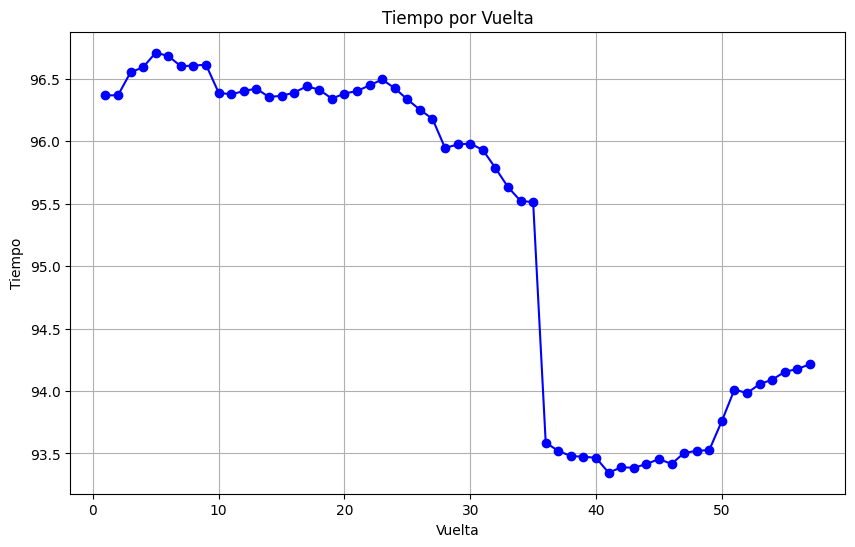

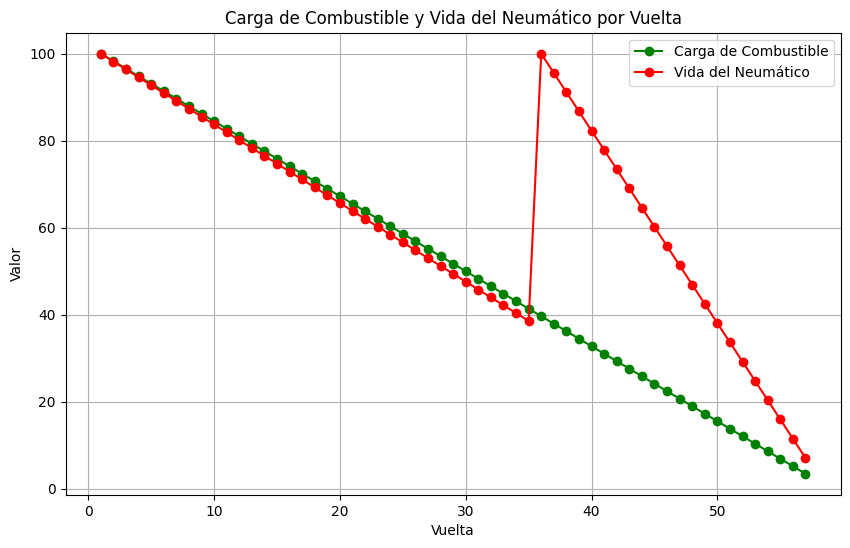

In [136]:
import matplotlib.pyplot as plt
print(tiempo_total)
# Número de vueltas, asumiendo que cada tiempo en la lista corresponde a una vuelta
vueltas = list(range(1, len(tiempos_Vueltas) + 1))

# Gráfico para el Tiempo por Vuelta
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico a tu preferencia
plt.plot(vueltas, tiempos_Vueltas, marker='o', linestyle='-', color='b')
plt.title('Tiempo por Vuelta')
plt.xlabel('Vuelta')
plt.ylabel('Tiempo')
plt.grid(True)
plt.show()  # Muestra el gráfico del Tiempo por Vuelta

# Gráfico para Carga de Combustible y Vida del Neumático
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico a tu preferencia
plt.plot(vueltas, cargaCombustible, marker='o', linestyle='-', color='g', label='Carga de Combustible')
plt.plot(vueltas, Vida_neumatico, marker='o', linestyle='-', color='r', label='Vida del Neumático')
plt.title('Carga de Combustible y Vida del Neumático por Vuelta')
plt.xlabel('Vuelta')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()  # Muestra el gráfico de Carga de Combustible y Vida del Neumático

